In [46]:
import sys
sys.path.insert(0, 'C:/Users/Franco/Documents/AnacondaProjects/Predicting_Conflicts')
from Libs import *

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [47]:
df = pd.read_csv('C:/Users/Franco/Documents/AnacondaProjects/Predicting_Conflicts/DataMerge/df_final.csv', index_col=0)

In [48]:
df.head()

,year,country,amount,Tools,Vehicles,Weapons,Prom Tools,Prom Vehicles,Prom Weapons,conflict,conflict-1-to-3,conflict-4-to-6,conflict-7-to-9,Prom USA,country encoded
0,1946,Bolivia,nan,nan,nan,nan,0.00,0.00,0.00,True,NaN,NaN,NaN,0.00,21
1,1952,Bolivia,nan,nan,nan,nan,0.00,0.00,0.00,True,NaN,True,NaN,0.00,21
2,1967,Bolivia,nan,nan,53.00,24.00,nan,9.33,nan,True,True,True,True,0.00,21
3,1946,Cambodia,nan,nan,nan,nan,0.00,0.00,0.00,True,NaN,NaN,NaN,0.00,30
4,1947,Cambodia,nan,nan,nan,nan,nan,nan,nan,True,True,NaN,NaN,0.00,30


In [49]:
def country(country):
    dff = df[df['country'] == country].sort_values('year')
    fig = plt.figure()
    ax1 = plt.subplot2grid((7,1), (0,0), rowspan=6, colspan=1)
    ax1.grid(True)
    plt.title(country)
    plt.ylabel('Cantidad de armas')
    plt.xlabel('Año')




    ax1.set_xticks(dff.iloc[:, 0])
    plt.xticks(rotation=50)

    ax1.plot(dff.iloc[:, 0], dff.iloc[:,5])
    ax1.plot(dff.iloc[:, 0], dff.iloc[:,8])

    ax1.fill_between(dff.iloc[:, 0],0,  dff.iloc[:, 5], where=(dff['conflict'] == True), facecolor='r', alpha=0.5, interpolate=True)
    ax1.fill_between(dff.iloc[:, 0], dff.iloc[:, 5], where=(dff['conflict'] == False), facecolor='g', alpha=0.5, interpolate=True)

    #ax1.fill_between(df_argentina.iloc[:, 0], df_argentina.iloc[:, 8], alpha=0.3)

    #ax1.plot(df_argentina.iloc[:, 0], df_argentina.iloc[:,4])
    #ax1.plot(df_argentina.iloc[:, 0], df_argentina.iloc[:,3])
    #ax1.plot(df_argentina.iloc[:, 0], df_argentina.iloc[:,2])
    #plt.savefig('uk.png')
    plt.show()

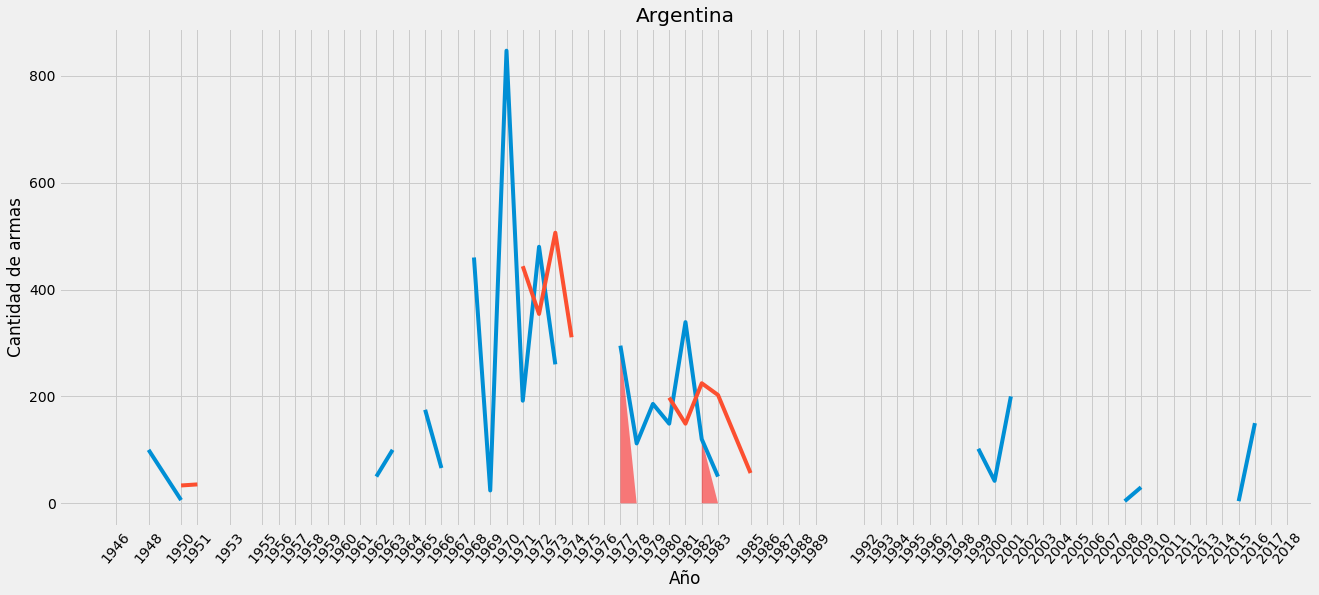

In [51]:
country('Argentina')

In [58]:
df_na = df.iloc[:, :6]
df_na

,year,country,amount,Tools,Vehicles,Weapons
0,1946,Bolivia,nan,nan,nan,nan
1,1952,Bolivia,nan,nan,nan,nan
2,1967,Bolivia,nan,nan,53.00,24.00
3,1946,Cambodia,nan,nan,nan,nan
4,1947,Cambodia,nan,nan,nan,nan
5,1948,Cambodia,nan,nan,nan,nan
6,1949,Cambodia,nan,nan,nan,nan
7,1950,Cambodia,nan,nan,nan,nan
8,1951,Cambodia,nan,nan,nan,nan
9,1952,Cambodia,nan,nan,nan,nan


In [66]:
labels = []
values = []

for col in df_na.columns:
    labels.append(col)
    values.append(df_na[col].notna().sum())
    print(col, values[-1])

year 8578
country 8578
amount 3258
Tools 2058
Vehicles 5526
Weapons 3322


In [67]:
len(df)

8578

<function matplotlib.pyplot.show(*args, **kw)>

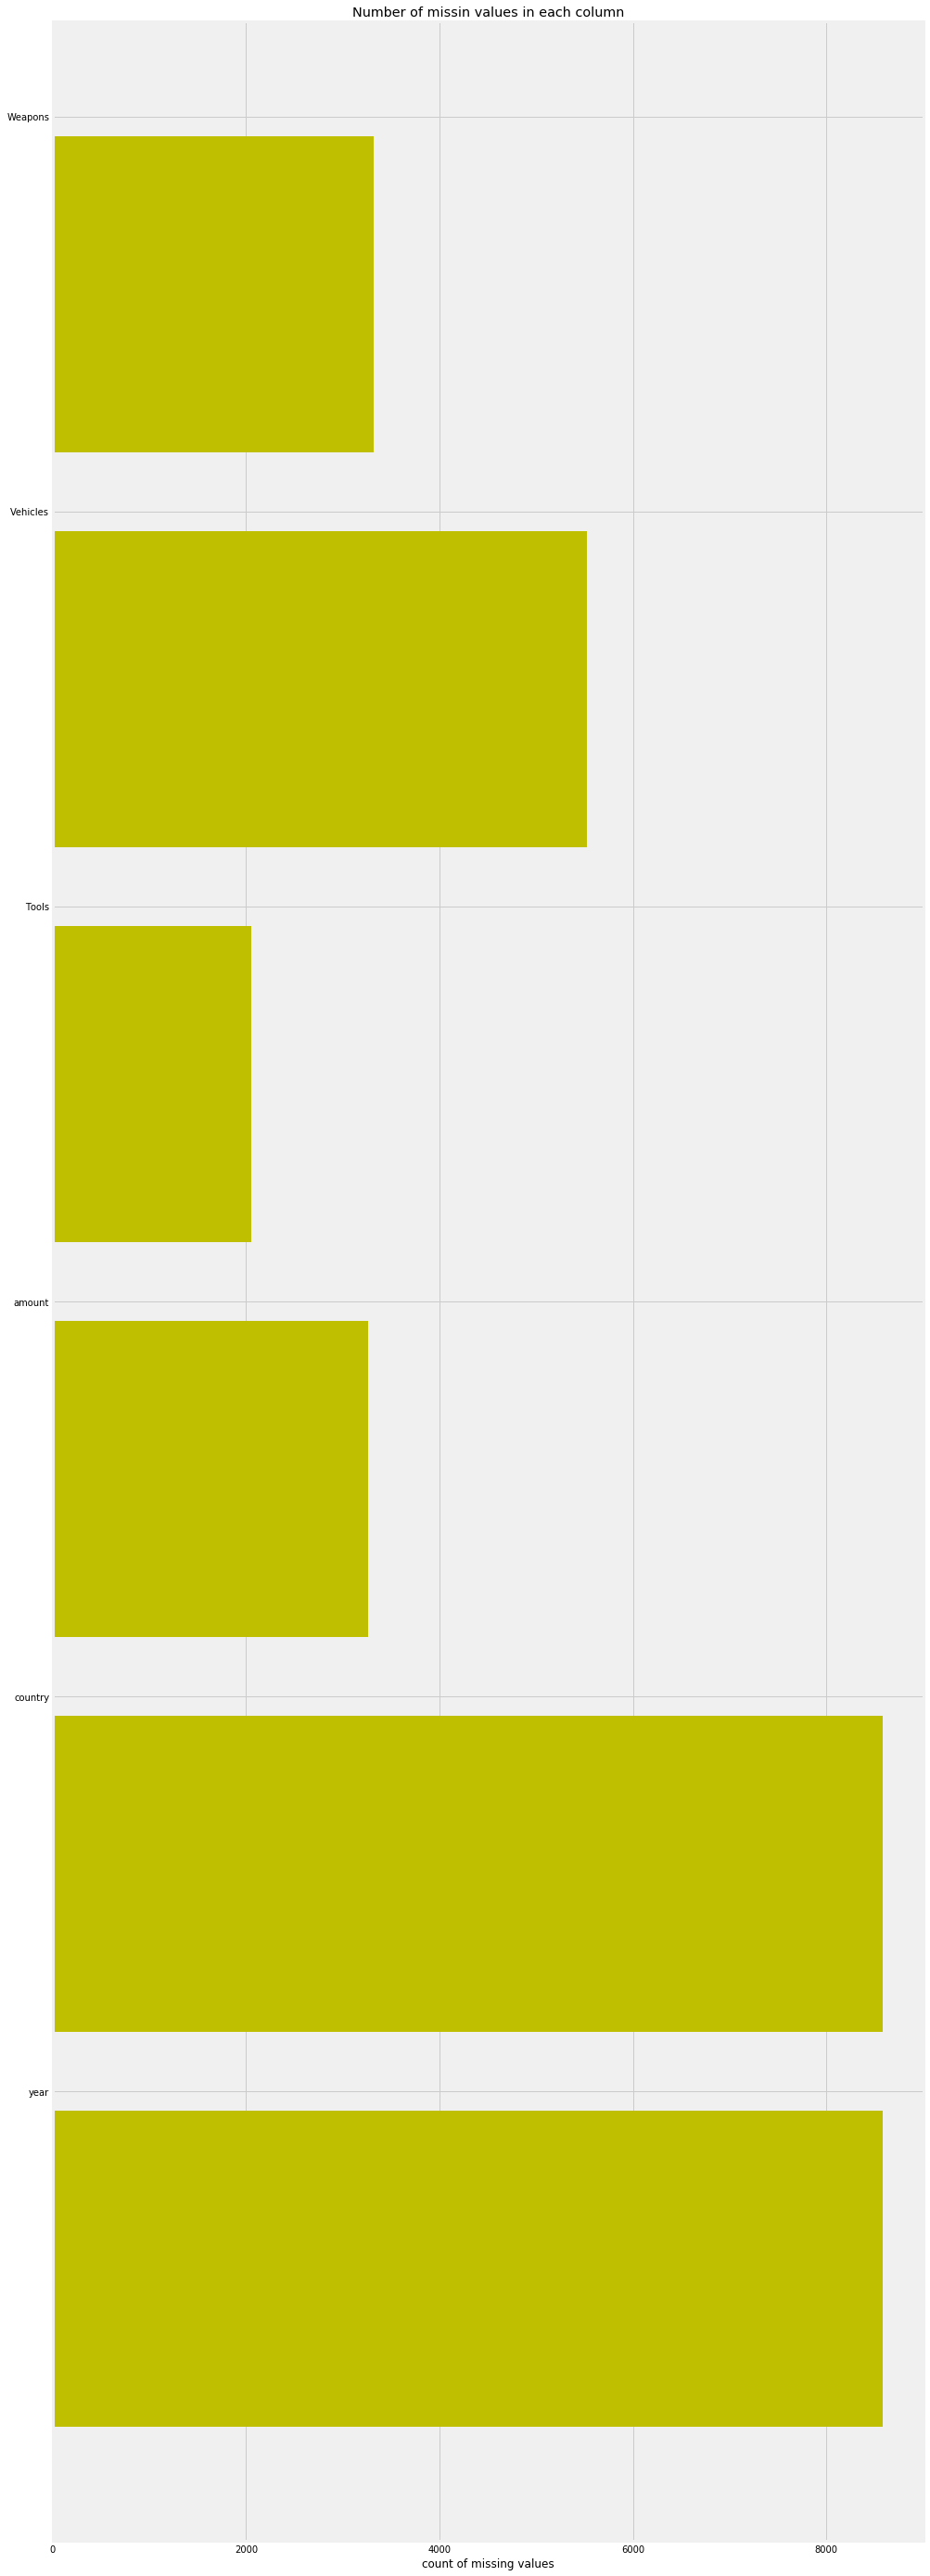

In [68]:
%matplotlib inline

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize = (15, 50))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+(width)/2.)
ax.set_yticklabels(labels, rotation = 'horizontal')
ax.set_xlabel('count of missing values')
ax.set_title('Number of missin values in each column')
plt.show

In [69]:
df_sinna = df[df[['Weapons', 'amount', 'Vehicles', 'Tools']].notna()]

In [86]:
df_sinna = df
df_sinna = df_sinna[df_sinna['Weapons'].notna()] # and            , 'amount', 'Vehicles', 'Tools']].notna()]
#df_sinna = df_sinna[df_sinna['amount'].notna()]
df_sinna = df_sinna[df_sinna['Vehicles'].notna()]
#df_sinna = df_sinna[df_sinna['Tools'].notna()]
#df_sinna = df_sinna[df_sinna['conflict'].notna()]
len(df_sinna)


2689

In [87]:
df_sinna

,year,country,amount,Tools,Vehicles,Weapons,Prom Tools,Prom Vehicles,Prom Weapons,conflict,conflict-1-to-3,conflict-4-to-6,conflict-7-to-9,Prom USA,country encoded
2,1967,Bolivia,nan,nan,53.00,24.00,nan,9.33,nan,True,True,True,True,0.00,21
14,1949,China,nan,nan,5200.00,3000.00,nan,nan,nan,True,True,NaN,NaN,0.00,37
18,1949,Greece,nan,nan,105.00,587.00,nan,nan,nan,True,True,NaN,NaN,0.00,70
24,1966,Iran,nan,8.00,176.00,3721.00,nan,75.67,nan,True,True,True,True,0.00,85
25,1967,Iran,nan,nan,51.00,1065.00,nan,102.67,nan,True,True,True,True,0.00,85
29,1981,Iran,nan,nan,856.00,2600.00,nan,46.67,nan,True,True,True,True,0.00,85
30,1982,Iran,nan,nan,326.00,6700.00,nan,330.33,nan,True,True,True,True,0.00,85
31,1983,Iran,nan,35.00,53.00,480.00,nan,437.33,nan,True,True,True,True,0.00,85
32,1984,Iran,nan,nan,3.00,500.00,nan,411.67,3260.00,True,True,True,True,0.00,85
33,1985,Iran,nan,nan,58.00,1939.00,nan,127.33,2560.00,True,True,True,True,0.00,85
